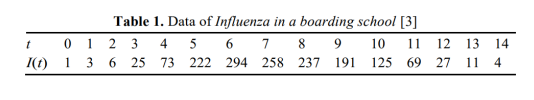

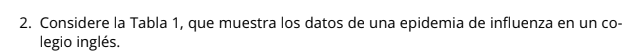

# **Solucion a)**

In [7]:
t = [i for i in range(15)]
I = [1, 3, 6, 25, 73, 222, 294, 258, 237, 191, 125, 69, 27, 11, 4]
print("Tabla 1")
print("t\t", end = "")
for i in t: print(f"{str(i)}\t", end = "")
print("\nI(t)\t", end = "")
for i in I: print(f"{str(i)}\t", end = "")


Tabla 1
t	0	1	2	3	4	5	6	7	8	9	10	11	12	13	14	
I(t)	1	3	6	25	73	222	294	258	237	191	125	69	27	11	4	

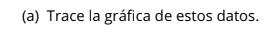

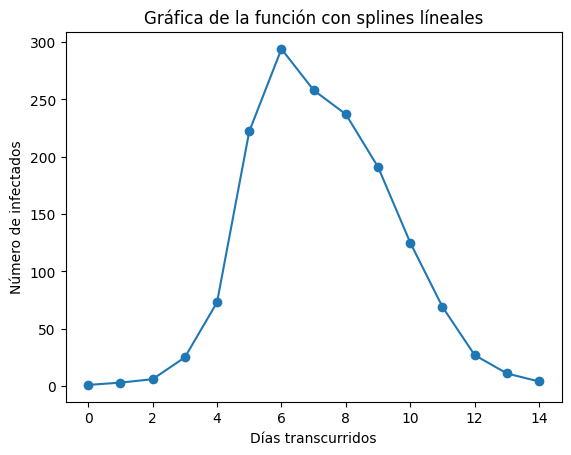

In [8]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(t, I)
plt.plot(t, I)
plt.ylabel("Número de infectados")
plt.xlabel("Días transcurridos")
plt.title("Gráfica de la función con splines líneales")
plt.show()

# **Solucion a)**

In [9]:
n = 14
x, y, h = t, I, []
a, l, z, m = [0], [1], [0], [0]
abcd = {0 : y, 1 : [], 2 : [], 3 : []}
for i in range(n + 1):
  abcd[2].append(0)

for i in range(n):
  h.append(x[i + 1] - x[i])
  abcd[1].append(0)
  abcd[3].append(0)

for i in range(1, n):
  a.append(3 * (y[i + 1] - y[i]) / h[i] - 3 * (y[i] - y[i - 1]) / h[i - 1])
  l.append(2 * (x[i + 1] - x[i - 1]) - h[i - 1] * m[i - 1])
  m.append(h[i] / l[i])
  z.append((a[i] - h[i - 1] * z[i - 1]) / l[i])
l.append(1)
z.append(0)

for j in range(n - 1, -1, -1):
  abcd[2][j] = z[j] - m[j] * abcd[2][j + 1]
  abcd[1][j] = ((abcd[0][j + 1]- abcd[0][j]) / h[j] - h[j] * (abcd[2][j + 1] + 2 * abcd[2][j]) / 3)
  abcd[3][j] = (abcd[2][j + 1] - abcd[2][j]) / (3 * h[j])

S = ["" for i in range(n)]
for i in range(len(S)):
  S[i] += str(abcd[0][i])
  for j in range(1, 4):
    S[i] += f" + {abcd[j][i]}*(x - {x[i]})**{j}"

print("El polinomio S definido por trozos es:")
for i in range(n): print(f"S_{i}(x) = {S[i]}   para {x[i]} < x < {x[i + 1]}")

El polinomio S definido por trozos es:
S_0(x) = 1 + 2.9079219611941243*(x - 0)**1 + 0.0*(x - 0)**2 + -0.9079219611941244*(x - 0)**3   para 0 < x < 1
S_1(x) = 3 + 0.184156077611751*(x - 1)**1 + -2.7237658835823733*(x - 1)**2 + 5.539609805970621*(x - 1)**3   para 1 < x < 2
S_2(x) = 6 + 11.35545372835887*(x - 2)**1 + 13.895063534329493*(x - 2)**2 + -6.250517262688365*(x - 2)**3   para 2 < x < 3
S_3(x) = 25 + 20.39402900895276*(x - 3)**1 + -4.856488253735602*(x - 3)**2 + 32.46245924478284*(x - 3)**3   para 3 < x < 4
S_4(x) = 73 + 108.0684302358301*(x - 4)**1 + 92.53088948061293*(x - 4)**2 + -51.59931971644303*(x - 4)**3   para 4 < x < 5
S_5(x) = 222 + 138.3322500477269*(x - 5)**1 + -62.26706966871615*(x - 5)**2 + -4.065180379010741*(x - 5)**3   para 5 < x < 6
S_6(x) = 294 + 1.6025695732623646*(x - 6)**1 + -74.46261080574837*(x - 6)**2 + 36.860041232486005*(x - 6)**3   para 6 < x < 7
S_7(x) = 258 + -36.74252834077637*(x - 7)**1 + 36.117512891709644*(x - 7)**2 + -20.374984550933277*(x - 7)**

In [10]:
def create_evaluation_functions():
    num_functions = n

    functions = []
    for i in range(num_functions):
        function_name = f"S_{i}"
        function_expression = S[i]

        function_code = f"def {function_name}(x):\n    return {function_expression}"

        functions.append(function_code)

    generated_functions = "\n\n".join(functions)
    #print("\nGenerated functions:\n")
    #print(generated_functions)

    exec(generated_functions, globals())
    #print("\nFunctions created successfully!")
create_evaluation_functions()

In [11]:
X_arrays, Y_arrays = [], []
for i in range(n):
  X_arrays.append(np.arange(x[i], x[i + 1], 0.001))
  Y_arrays.append(eval(f"S_{i}(X_arrays[i])"))

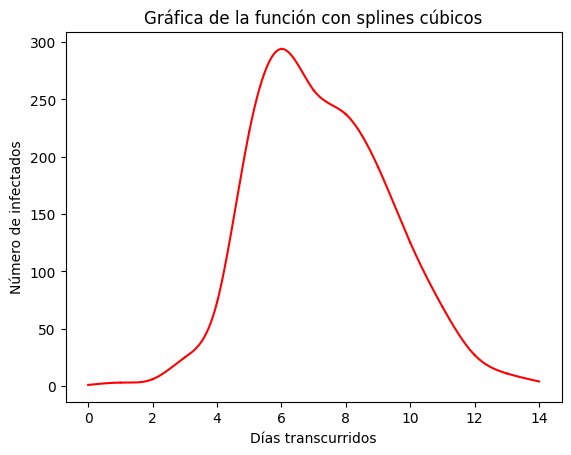

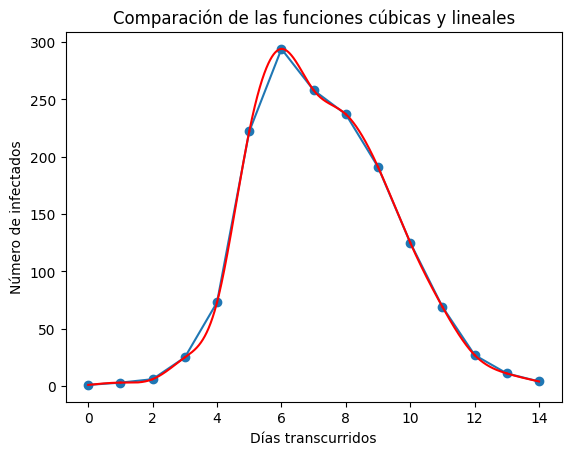

In [12]:
for i in range(n): plt.plot(X_arrays[i], Y_arrays[i], color = "r")
plt.ylabel("Número de infectados")
plt.xlabel("Días transcurridos")
plt.title("Gráfica de la función con splines cúbicos")
plt.show()

plt.scatter(t, I)
plt.plot(t, I)
for i in range(n): plt.plot(X_arrays[i], Y_arrays[i], color = "r")
plt.ylabel("Número de infectados")
plt.xlabel("Días transcurridos")
plt.title("Comparación de las funciones cúbicas y lineales")
plt.show()